# Linear Algebra Tutorial
## April 21, 2016 -- Stephen Roller <roller@cs.utexas.edu>

### Overview
- What is Linear Algebra
- Definitions
    - Scalar, Matrix, Vector
- Operations
    - Scalar, vector addition
    - Inner product
    - Matrix multiplication
    - Transpose
- Special Matrices
    - Identity
    - Inverses
    - Unitary
    - Other: Symmetric, Diagonal
- Norms, Similarity Measures
- Singular Value Decomposition
    - Definition
    - Interpretations (change of basis, rotation and skew, etc)
    - Usefulness
- Honorary Mentions
    - Eigendecomposition
    - Scipy.sparse
    - Scikit-learn

# Linear Equations

There are different interpretations of Linear Algebra, but the one typically used in introductory texts is that Linear Algebra is about systems of linear equations. You may remember linear equations from algebra class. They often have a form

\begin{align}
    f(x) = mx + b
\end{align}

In this *linear equation*, x is the *variable*, m and b are *parameters* of the equation. This function only has one variable and two parameters, but we can generalize it to have more parameters:

\begin{align}
    f(x,y,z) = ax + by + cz + d
\end{align}

This equation has 3 variables and 4 parameters. But how do we represent equations with an arbitrary number of variables? This is where *vectors* comes into play. In regular Algebra class, most of the numbers you see are called *scalars*: they're just a number, which could be a Real number ($x \in R$), or an Integer ($x \in Z$) or an imaginary number ($x \in C$). A vector is a generalization of this, where a quantity can hold multiple values.

For example, we can define a vector ${\bf x} \in R^3$, which is a real-valued vector with three dimensions. Perhaps ${\bf x}$ has the following value:

\begin{align}
    {\bf x} = \begin{pmatrix}1\\4\\3\end{pmatrix}
\end{align}

What does this mean? Well, that's up to you. If we were in physics, perhaps ${\bf x}$ is the position of an object. Maybe it's 1 foot in front of me, 4 feet to my left, and 3 feet above my head. In Computational Linguistics, we'll typically see these dimensions either correspond to particular features, or maybe co-occurrence counts, or latent semantic representations, or any number of things.

Vectors have a number of operations on them. For example, we can do scalar-vector multiplication, addition, etc.

\begin{align}
    2 + {\bf x} & =\begin{pmatrix}2 + 1\\2 + 4\\2 + 3\end{pmatrix} = \begin{pmatrix}3\\6\\5\end{pmatrix}\\
    2{\bf x} & = \begin{pmatrix}2 * 1\\2 * 4\\2 * 3\end{pmatrix} = \begin{pmatrix}2\\8\\6\end{pmatrix}\\
    -{\bf x} & = \begin{pmatrix}-1\\-4\\-3\end{pmatrix}\\
\end{align}




# Motivation as CompLing

So I work mostly in Distributional Semantics, where all words are encoded as vectors. The following is kind of the standard "intro to Distributional Semantics" picture. In Distributional Semantics, we're count all of the contexts in which a word appears, and use these to create a vector for each word. Given that we're going to model words as vectors, having a good understanding of Linear Algebra can be very helpful.

![distsem](http://i.imgur.com/SvAGdtT.png)

## Demo time

In [660]:
# This is necessary to make sure equations and graphs appear directly in this document
%matplotlib inline
# We're going to be using a lot of Numpy
import numpy as np
import pylab as plt
# this makes it so something like .0000000012 just shows up as 0.0 instead of 1.2e-9
np.set_printoptions(suppress=True)

# I use this code to make some of the pretty plots. Matplotlib is a horrible, unusuable mess though.
def norm(x):
    return x/np.sqrt(x.dot(x))

def plot_vectors(vectors, labels=None, starts=None):
    colors = 'rbgyk'
    vectors = np.array(vectors)
    # clear the plot
    plt.clf()
    fig = plt.figure(figsize=(5, 5))
    if starts is None:
        starts = vectors * 0
    minbound = min((vectors + starts).min()-1, -1)
    maxbound = (vectors + starts).max()+1
    plt.xticks(np.arange(minbound, maxbound))
    plt.yticks(np.arange(minbound, maxbound))
    plt.xlim([minbound, maxbound])
    plt.ylim([minbound, maxbound])
    for i in xrange(len(vectors)-1, -1, -1):
        v = vectors[i]
        color=colors[i]
        s = starts[i]
        plt.quiver(s[0], s[1], v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color)
        if labels:
            mid = 0.5*(v) + s
            offset = (v).dot((np.array([0, -1, 1, 0]).reshape(2, 2)))
            offset = 0.25*norm(offset)
            pos = offset
            plt.text(mid[0]+pos[0], mid[1]+pos[1], labels[i], color=color)
    plt.show()

# we'll need this sometimes
zero2 = np.zeros(2)

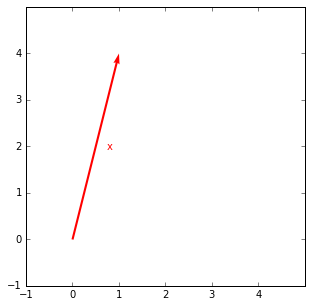

In [661]:
x = np.array([1, 4])
plot_vectors([x], ["x"])

In [662]:
# Now let's define a vector and try vector-scalar:
x = np.array([1, 4])
2 * x
# = [2 * 1, 2 * 4]

array([2, 8])

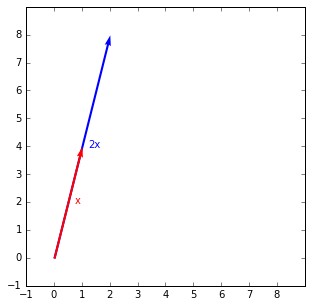

In [663]:
plot_vectors([x, 2 * x], ["x", "2x"])

In [664]:
# Vector addition:
y = np.array([4, -1])
x + y
# = [1 + 4, 4 - 1]

array([5, 3])

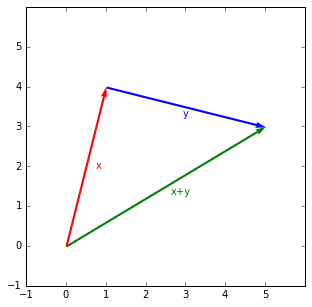

In [665]:
plot_vectors([x, y, x + y], starts=[zero2, x, zero2], labels=["x", "y", "x+y"])

### Indexing

It's also useful to be able to *index* into vectors, to extract or set their value for one particular dimension. In this tutorial, we use 0-based indexing, though most math textbooks will typically use 1-based indexing.

So $x_0$ is the first element of $\bf x$, and $x_1$ is the second, etc.

In [673]:
# Indexing time!
x = np.array([1, 2, 3])

In [667]:
x[0]

1

In [674]:
x[1]

2

In [675]:
# numpy also lets us use negative indices, which count *backwards*
x[-1]

3

In [677]:
# and we can also do boolean masks
x >= 2

array([False,  True,  True], dtype=bool)

In [678]:
x[np.array([False, True, True])]

array([2, 3])

In [680]:
x[x >= 2]

array([2, 3])

# Matrices and Matrix Multiplication

So far we've seen scalars, which are singleton numbers, and vectors, which is an array of numbers. We can also introduce the generalization: the matrix. A matrix is a two dimensional array of numbers.

Notation-wise scalars are in italics, vectors are in bold, matrices are usually capitalized.

\begin{align}
    {\bf A} = \begin{pmatrix}1 & 2 & 3\\4 & 5 & 6\end{pmatrix}
\end{align}

We say that matrix $A \in R^{2\times3}$, meaning A has two rows and 3 columns.

A can have any positive number of rows and columns. If the number of rows and columns are equal, then A is **square**. If A has only 1 column, then A is also a **column vector**, and if A has only 1 row, then it's a **row vector**. If A has 1 row and 1 column, then A is a scalar.

## Operations
Matrices also have the same scalar multiplication and addition properties as vectors, being they are done element wise.

In [681]:
# Define a matrix
A = np.array([np.array([1, 2, 3]), np.array([4, 5, 6])])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [682]:
# You won't be hand-typing matrices very often, but it can also be useful to know this trick:
A = np.array([1, 2, 3, 4, 5, 6]).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [683]:
# Scalar addition is element wise
A + 1

array([[2, 3, 4],
       [5, 6, 7]])

In [684]:
# as is scalar multiplication
-2 * A

array([[ -2,  -4,  -6],
       [ -8, -10, -12]])

In [685]:
# and is matrix addition
B = np.array([-1, -2, -3, 
              -4, -5, -6]).reshape(2, 3)
A + B

array([[0, 0, 0],
       [0, 0, 0]])

In [686]:
# Mind that dimensions must line up though!
C = np.array([1, 2, 3, 4]).reshape(2, 2)
A + C
# can't add a (2, 3) matrix with a (2, 2) matrix

ValueError: operands could not be broadcast together with shapes (2,3) (2,2) 

In [687]:
# Strictly speaking, this is poor mathematics,
# but it's often abused notation in the ML community:
# adding a vector with a matrix is interpreted as "broadcasting" or "repeating"
# the vector across the matrix and then adding
A + np.array([1, 2, 3])
# = [A[0] + x;
#    A[1] + x]

array([[2, 4, 6],
       [5, 7, 9]])

In [688]:
# Matrices can also be indexed, but now they have two dimensions
A[0,1]
# first row, second column

2

In [689]:
# We can also index into rows
A[0]
# (the first row)

array([1, 2, 3])

In [690]:
# or into columns:
A[:,1]
# (the second column)

array([2, 5])

# Multiplication

So far we've seen how to do addition and scalar multiplication with matrices and vectors, but we haven't talked about multiplication. So far you may expect that matrix multiplication is also done element-wise, but it is not. Element-wise multiplication is sometimes called the Hadamard product, and is notated as $A \odot B$. But it's used *very* rarely.

Before we get to matrix multiplication, we'll talk about the **dot product** or the **inner product** of two vectors. The dot product between two vectors, ${\bf x} \cdot {\bf y}$ is defined by an element-wise multiplication, and then the sum over these components.
\begin{align}
    {\bf x}\cdot{\bf y} = \sum_{i=1}^n (x_i \times y_i)
\end{align}

Note that the dot product takes **two vectors** and returns a **scalar**.

In [695]:
x = np.array([1, 4, 3])
y = np.array([4, -1, 2])
# Let's try out the dot product now
x.dot(y)
# (1 * 4) + (4 * -1) + (3 * 2) = 6

6

In [696]:
# Remember vectors have to be the same dimensionality to have the dot product taken
twodim = np.array([1, 1])
x.dot(twodim)
# can't take the product of (3,) vector and a (2,) vector

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

## Matrix-vector multiplication

Now we'll define Matrix-vector multiplication. This helps us build up to Matrix-Matrix multiplication.

Matrix-vector multiplication works like taking multiple dot products in a row.

\begin{align}
A{\bf x} = \begin{pmatrix}{\bf A_0} \cdot {\bf x}\\{\bf A_1} \cdot {\bf x}\\\ldots\end{pmatrix}
\end{align}

That is, for every **row** in $A$, we're going to take its dot product with $x$.

In [697]:
x = np.array([1, 4])
A = np.array([1, 0.5,
              -2, 0.5]).reshape(2, 2)
A[0].dot(x)

3.0

In [698]:
A[1].dot(x)

0.0

In [699]:
A.dot(x)

array([ 3.,  0.])

Matrices can be viewed as *linear transformations*. That is, they act as a combination of **rotations**, **flips**, **scales** and **skews**.

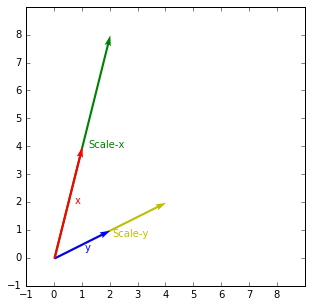

In [700]:
x = np.array([1, 4])
y = np.array([2, 1])
scale = np.array([2, 0,
                  0, 2]).reshape(2, 2)
#plot_vectors([x, y, A.dot(x), A.dot(y)], ["x", "y", "Ax", "Ay"])
plot_vectors([x, y, scale.dot(x), scale.dot(y)], ["x", "y", "Scale-x", "Scale-y"])

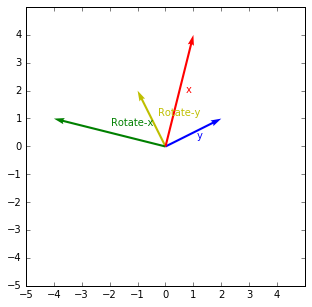

In [701]:
rotate = np.array([0, -1,
                   1,  0]).reshape(2, 2)
plot_vectors([x, y, rotate.dot(x), rotate.dot(y)], ["x", "y", "Rotate-x", "Rotate-y"])

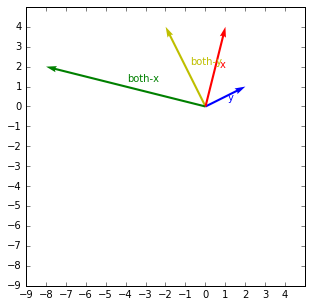

In [702]:
# we can also combine the transformations
both = rotate.dot(scale)
plot_vectors([x, y, both.dot(x), both.dot(y)], ["x", "y", "both-x", "both-y"])

What we really want to emphasize about matrix-vector multiplication is that it's just a series of repeated dot products, across all the rows of A.

## Matrix-matrix multiplication

We're now ready for Matrix-Matrix Multiplication. Matrix-Matrix multiplication is pretty weird at first, and can be hard to keep in your head at times. But just like Matrix-vector multiplication, we did a whole bunch of dot products across rows, now we're going to do them across both **rows** and **columns**.

If we say, $C = AB$, then $C$ is defined as:

\begin{align}
    C_{i,j} = A_{i,:}\cdot B_{:,j}
\end{align}

Which is to say:
- $C_{0,0}$ is the dot product between the 0th **row** of A, and the 0th **column** of B;
- $C_{1,0}$ is the dot product between the 1st row of A, and the 0th column of B;

Remember how the dot product requires vectorsto have the same number of dimensions? Well this goes for matrices two, but only on the inner index.

so $A \in R^{2\times3}$ multiplies with $B \in R^{3\times4}$ and produces a $R^{2\times4}$ matrix.

This picture always helps me.
![mm](https://www.mathsisfun.com/algebra/images/matrix-multiply-a.gif)

In [703]:
A = np.array([1, 2, 3, 4, 5, 6]).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [704]:
B = np.array([7, 8, 9, 10, 11, 12]).reshape(3, 2)
B

array([[ 7,  8],
       [ 9, 10],
       [11, 12]])

In [705]:
A.dot(B)
# = [
#   1 * 7 + 2 * 9 + 3 * 11       1 * 8 + 2 * 10 + 3 * 12
#   4 * 7 + 5 * 9 + 6 * 11       4 * 8 + 5 * 10 + 6 * 12
#]

array([[ 58,  64],
       [139, 154]])

In [706]:
# But the inner dimension has to line up
A.shape # has 3 in the right

(2, 3)

In [707]:
B.shape # has 3 in the left

# so we can do AB. Yay!

(3, 2)

## Matrix multiplication is *not commutative*

In [708]:
# But what about the other around?
A.dot(B)

array([[ 58,  64],
       [139, 154]])

In [709]:
B.dot(A)
# not even the same size, let alone same answer!

array([[ 39,  54,  69],
       [ 49,  68,  87],
       [ 59,  82, 105]])

But it is **distributive** and **associative**.

In [711]:
# but it is distributive:
C = np.array([1, 1, 1,
              1, 1, 1]).reshape(2, 3)
((A + C).dot(B) == 
 (A.dot(B) + C.dot(B)))

array([[ True,  True],
       [ True,  True]], dtype=bool)

In [714]:
# And associative:
A.dot(B.dot(C)) == (A.dot(B)).dot(C)

array([[ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

### Transpose
Another useful operation is the Transpose. The transpose $A^\top$ is to "switch" the matrix's indices.

In [715]:
B

array([[ 7,  8],
       [ 9, 10],
       [11, 12]])

In [716]:
B.T

array([[ 7,  9, 11],
       [ 8, 10, 12]])

We should also note that this transpose operation allows us to switch something between a column vector and a row vector. Therefore, for some vectors ${\bf x}$ and ${\bf y}$, a more common notation in papers for the dot product is:

\begin{align}
{\bf x}\cdot{\bf y} = {\bf x}^\top{\bf y}
\end{align}

Why does that work? Because of the a $1\times n$ matrix multiplied by a $n \times 1$ matrix gives a $1 \times 1$ matrix, which is a scalar. It's all circular, and there are multiple ways to look at it!

## Special Matrices
There's a handful of special types of matrices worth mentioning. We already mentioned one: a **square** matrix has the same number of rows and columns.

A **diagonal matrix** has all zeros, except along the diagonal. Diagonal matrices need not be square, but they usually are.

In [717]:
D = np.diag([2, 3, 8])
D
# nonzero only along the diagonal

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 8]])

In [718]:
# use np.diag to find the diagonal elements.
np.diag(D)

array([2, 3, 8])

A **symmetric** matrix is equal to its own transpose. They're useful for when the order of arguments doesn't matter, and can be stored more efficiently, though we don't often go through the trouble.

In [720]:
S = np.array([1, 2,
              2, 1]).reshape(2, 2)
S

array([[1, 2],
       [2, 1]])

In [721]:
S.T

array([[1, 2],
       [2, 1]])

Finally, there's the **Identity matrix**, which is a diagonal matrix whose nonzero values are one. Again, the identity matrix doesn't *have* to be square, but it almost always is. They're special because all matrices are idempotent in multiplication with the identity matrix. They're the equivalent of "multiplying by 1" in algebra.

In [722]:
I = np.eye(3) # make a 3x3 identity matrix
I

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [723]:
B = np.array([1, 2, 3,
              4, 5, 6,
              7, 8, 9]).reshape(3, 3)
B.dot(I)

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

This also brings up **matrix inverses**, $A^{-1}$. The *inverse* of a matrix A multiplied by A gives the identity matrix. This is *roughly* the matrix-equivalent of division. Just like 3/3 = 1, we have:

\begin{align}
    AA^{-1} = I\\
    A^{-1}A = I
\end{align} 

Matrix inverses are only defined for square matrices, though there is a generalization called the Moore-Penrose Pseudoinverse, which we will not cover here.

In [724]:
R = np.random.rand(4, 4)
R

array([[ 0.51706641,  0.26425769,  0.95885096,  0.06944085],
       [ 0.2985238 ,  0.99317491,  0.82751013,  0.87166016],
       [ 0.37154277,  0.32244945,  0.59136661,  0.70020566],
       [ 0.23764522,  0.75019798,  0.46432511,  0.45950399]])

In [725]:
# The inverse is very slow, and you probably don't want to use it in practice, but let's see how it works.
np.set_printoptions(suppress=False) # needed to illustrate instability
Rinv = np.linalg.inv(R)
Rinv.dot(R)
# notice all the elements that are close to zero but *not quite*? That's numerical instability.

array([[  1.00000000e+00,   1.77635684e-15,   8.88178420e-16,   8.88178420e-16],
       [ -1.11022302e-16,   1.00000000e+00,  -2.22044605e-16,  -1.66533454e-16],
       [ -2.22044605e-16,  -4.44089210e-16,   1.00000000e+00,   0.00000000e+00],
       [  1.66533454e-16,   0.00000000e+00,   1.11022302e-16,   1.00000000e+00]])

In [726]:
R.dot(Rinv)
# it goes the other way around too

array([[  1.00000000e+00,   4.44089210e-16,   0.00000000e+00,   0.00000000e+00],
       [ -1.66533454e-16,   1.00000000e+00,   3.33066907e-16,   0.00000000e+00],
       [ -1.14491749e-16,   0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -4.16333634e-17,   2.22044605e-16,  -2.22044605e-16,   1.00000000e+00]])

### Unitary matrices

There's also a very special class of matrices, called *unitary matrices*, or *orthonormal matrices*, of which their *transpose* is their *inverse*.

\begin{align}
    U^\top = U^{-1}\\
    UU^\top = I\\
    U^\top U = I
\end{align}

(Technically, unitary matrices are the for matrices of complex numbers; orthonormal is a subset of unitary matrices which are real numbers).

In [729]:
# go back to suppressing scientific notation
np.set_printoptions(suppress=True)

# never mind the man behind the curtain, just generating a random unitary matrix!
U = np.linalg.qr(np.random.rand(5,5))[0]

U.dot(U.T)
# And let's see if U.dot(U.T) is approximately the identity

array([[ 1., -0.,  0., -0.,  0.],
       [-0.,  1., -0.,  0.,  0.],
       [ 0., -0.,  1., -0., -0.],
       [-0.,  0., -0.,  1., -0.],
       [ 0.,  0., -0., -0.,  1.]])

# Norms and Unit Vectors

Okay so we've covered the basic linear algebra operations, and some special kinds of matrices. Let's return to vectors, and visit some of the common "relationships" you see.

### Norms

Norms measure the "length" of a vector. There are countless types (it's an entire class of mathematical objects), but there's two you tend to see often in the ML literature.

The most common norm is the **2-norm**. This is also known as the **magnitude**.

\begin{align}
    \|{\bf x}\|_2 = \|{\bf x}\| = \sqrt{\sum_{i}x_i^2}
\end{align}

This is also related to **Euclidean distance** between two vectors, which is what you're used to seeing in geometry class. Remember how the shortest path between two points is a straight line? Well the distance between two points is the **2-norm** of their difference! Or put another way, the 2-norm of a vector is the euclidean distance to the origin. Circular!

\begin{align}
    \text{Euclid}({\bf x}, {\bf y}) = \|{\bf x} - {\bf y}\|
\end{align}

There's also the 1-norm, which uses the sum of the absolute value. It's also called Manhattan distance or Taxi cab distance, because it's the shortest distance along blocks.
\begin{align}
    \|{\bf x}\|_1 = \sum_{i}\text{abs}(x_i)
\end{align}

This picture illustrates it pretty well. Red, yellow and blue are all equivalent, and they're Manhattan distance. The Green line is Euclidean distance.

![manhattan vs euclidean distance](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/300px-Manhattan_distance.svg.png)

But wait, there's more! We can also define the l2-norm in terms of the dot product!
\begin{align}
    \|{\bf x}\| = \sqrt{{\bf x}^\top {\bf x}}
\end{align}

## Unit Vectors

There's also a special class of vectors, called the **unit vectors**, which are vectors whose magnitude (l2-norm) is 1. These vectors lie on the "unit ball", the hypersphere which has a radius of 1.

![unit ball](http://mathworld.wolfram.com/images/eps-gif/UnitSphere_800.gif)

We can turn any vector ${\bf x}$ into a normal vector, by dividing by its length. This is usually called *normalization*, but sometimes this term is overloaded to have other meanings.

\begin{align}
    {\bf u} = \frac{{\bf x}}{\|{\bf x}\|}
\end{align}

In [731]:
x = np.array([1, 4, 3])
np.sqrt(x.dot(x))
# check the magnitude of the vector

5.0990195135927845

In [735]:
# let's normalize its length
ux = x / np.sqrt(x.dot(x))
# now it has a length of one

In [734]:
np.sqrt(ux.dot(ux))

1.0

## Cosine similarity

The last measure we'll talk about is **cosine similarity**, which measures the **angle between the vectors**. That is, it is a way of measuring distance between two vectors while controlling for the length of each vector. This picture shows the difference between Euclidean distance and cosine similarity.

![cosine](http://semanticvoid.com/images/cosine_similarity.png)

Euclidean distance is always 0 or positive, but can range infinitely high. Cosine, on the other hand, has a **range of only -1 to 1.**

\begin{align}
\text{cosine}({\bf x}, {\bf y}) =  \frac{{\bf x}^\top {\bf y}}{\sqrt{\|{\bf x}\|\|{\bf y}\|}}
\end{align}

That is, cosine is the *dot product* after the vectors have been *normalized*.

When vectors have a cosine of 1, they are perfectly similar: these vectors point in exactly the same way, except their lengths may be different.

When vectors have a cosine of 0, they are said to be **orthogonal**. That is, they are at **right angles** of each other.

When vectors have a cosine of -1, they point in exactly opposite directions.

In [740]:
def norm(x):
    return x / np.sqrt(x.dot(x)) 

def cosine(x, y):
    return norm(x).dot(norm(y))

x = np.array([1, 3])
y = np.array([4, 2])
cosine(x, y)

0.70710678118654746

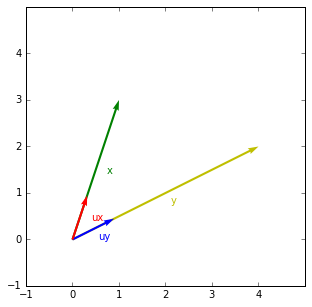

In [741]:
plot_vectors([norm(x), norm(y), x, y], ["ux", "uy", "x", "y"])

# Singular Value Decomposition

At this point, we want to introduce the Singular Value Decomposition, or the SVD. The SVD is a powerful theorem. It states that for **any given matrix** A, it has a **unique** factorization,

\begin{align}
    A = U\Sigma V^\top\\
\end{align}

such that $U$ and $V$ are unitary matrices, and $\Sigma$ is a diagonal matrix. Whoa! This is phenomenal. So literally every matrix can be factorized into these three primative matrices which have nice properties! Seriously, one of the coolest theorems I've ever seen.

The values along the diagonal of $\Sigma$ are called the **singular values**. The columns of U are called the **left singular vectors**, and the rows of $V^\top$ are the **right singular vectors**.

The values of $\Sigma$ are (almost) *always* ordered in decreasing magnitude. That is, $\Sigma_{0,0}$ has the largest singular value, $\Sigma_{1,1}$ has the second largest, etc. This is part of the reason the SVD is unique: without this stipulation, the SVD would have $O(n^2)$ variations, one for each of the permutation nof the singular values.

A caveat of this is one implementation in Numpy gives them in *reverse* order, which is incredibly annoying. Like seriously. Before we go more into interpretations or understanding it, we'll look to see how it's done in Numpy.

In [742]:
# first generate a random 6x3 matrix, then perform the SVD over it.
R = np.random.rand(8, 4)
# a few caveats: numpy returns Vt directly, so don't try to take the transpose
# Also, you almost always want full_matrices=False. This is because there are
# some implied 0's in filling the "smaller" matrix
U, S, Vt = np.linalg.svd(R, full_matrices=False)
U
# note that U has 6 rows and 2 columns.

array([[-0.21969474,  0.15728163,  0.31513222,  0.34457965],
       [-0.29777898,  0.56865193,  0.1026091 , -0.07980998],
       [-0.25376617,  0.53065093,  0.1052538 ,  0.32129013],
       [-0.38441626, -0.1397783 , -0.46734788, -0.09648322],
       [-0.31073606, -0.55359324,  0.47351322,  0.44700964],
       [-0.35277374, -0.15541121, -0.54363837,  0.2778405 ],
       [-0.36705927, -0.14152066,  0.36894152, -0.67931542],
       [-0.54327714, -0.01108438, -0.06924855, -0.15452016]])

In [743]:
S

array([ 3.02630515,  1.28562171,  0.65557079,  0.47683223])

In [744]:
Vt

array([[-0.54540879, -0.49970241, -0.57178207, -0.35481265],
       [ 0.69814529,  0.16079617, -0.513184  , -0.47263085],
       [-0.01659164,  0.21962833, -0.63538604,  0.74011668],
       [ 0.46351604, -0.82231714,  0.07740819,  0.32086659]])

In [746]:
# a few caveats: Numpy returns V.T, not V, so no need to do V.T here
np.allclose(R, U.dot(np.diag(S)).dot(Vt))

True

Notice how all the singular values drop off pretty fast? This is a really common thing to see in your own analysis. If you don't see this, something is probably really wrong with the data. Here's a graph of one from some website claiming this is on real data. It's what I usually see in my data:

![singular values](https://www.researchgate.net/profile/Pavel_Praks2/publication/237567849/figure/fig1/AS:298763131342848@1448242089760/Fig-2-Scree-plot-of-the-singular-values.png)

## Interpretations of the SVD

The most common interpretation of the SVD is the "cigar" interpretation. That is, Imagine our data is roughly shaped like a Cigar, rotated arbitrarily in space. The SVD finds the "main axes" of the cigar: the longest one (c in this picture) becomes the first left-singular vector, etc.

![cigar](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Triaxial_Ellipsoid.jpg/400px-Triaxial_Ellipsoid.jpg)

A picture of what each of the individual matrices does is here, though it's "backwards" from the way the SVD is usually used in data analysis.

![svd](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/300px-Singular-Value-Decomposition.svg.png)

So while this picture shows how M transforms the unit ball, we usually think of it the other way around: give me the data projected onto the unit ball, or at least a simple ellipsoid.

## Uses

- The SVD is one (slow, unstable) way to find a matrix inverse! All three of these matrices can be inverted trivially (U and V by taking transpose, Sigma by inverting the diagonal).
- The SVD is the [usual method](http://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca) which Principal Component Analysis is done. It is closely related to the Eigendecomposition, if anyone is interested in seeing this.
- The SVD is frequently used in data analysis to perform dimensionality reduction. For example, say you have 10,000 features in your data matrix; you can perform the SVD to find the top 50 main components of the data, and use only this reduced representation in your system.

## More on Dimensionality Reduction (how it's done)
Dimensionality Reduction is frequently used in distributional semantics. While a distributional space may have like 20k or 1M features for every word in the vocabulary. This can be unruly to work with, and very noisy. So by performing the SVD, we can find the say, top 300 main components of the data, and model only these.

Typically, when using the SVD for dimensionality reduction, you'll use only the top $K$ features, and zero out the remaining.

In [756]:
# let's see some dimensionality reduction
R = np.random.rand(100, 3)
N = np.random.normal(0, 0.05, R.shape)
# and for fun, let's say that M actually has the same 3 columns repeated over and over and over, with minor variatons

M = np.concatenate([R, R, -R, 2*R, R + N], axis=1)
M.shape
# now M is a (100, 12)

(100, 15)

In [757]:
U, S, Vt = np.linalg.svd(M, full_matrices=False)
U.shape

(100, 15)

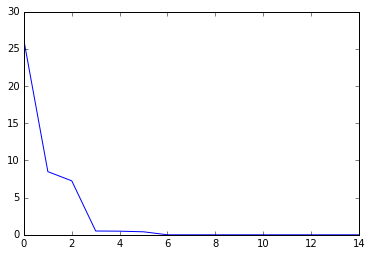

In [758]:
plt.clf()
plt.plot(S)
plt.show()

In [759]:
S

array([ 26.08982698,   8.48865245,   7.25197229,   0.50979629,   0.48755794,   0.40483637,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])

Hey look at that! The SVD immediately figured out there were some completely worthless dimensions in our data! Those all have a singular value of 0.

But we know that our data really has only 3 dimensions, so why does it have 6? Well that's the random noise left over.
We can try to drop that out by removing those singular values

In [760]:
S[3:] = 0

Mreduced = U.dot(np.diag(S)).dot(Vt)[:,:3]

In [761]:
R[:10]

array([[ 0.03218242,  0.38839865,  0.75755543],
       [ 0.26781915,  0.92282949,  0.06027154],
       [ 0.68652906,  0.17424214,  0.79347707],
       [ 0.25603414,  0.35634365,  0.30618563],
       [ 0.85028282,  0.91549486,  0.77725339],
       [ 0.34992216,  0.79296471,  0.07543746],
       [ 0.52065227,  0.4701467 ,  0.72268417],
       [ 0.63155438,  0.05855961,  0.93068135],
       [ 0.33191303,  0.87991512,  0.04269829],
       [ 0.97524692,  0.27638259,  0.8101152 ]])

In [762]:
Mreduced[:10]
# low and behold, we've recovered the original R matrix with surprisingly high accuracy

array([[ 0.03075146,  0.3893247 ,  0.755392  ],
       [ 0.26140432,  0.92779933,  0.04939463],
       [ 0.6722148 ,  0.17423435,  0.79306987],
       [ 0.25692225,  0.35649101,  0.31334753],
       [ 0.84446395,  0.90324484,  0.78137926],
       [ 0.35933168,  0.78921686,  0.06431634],
       [ 0.51345231,  0.47742226,  0.71737831],
       [ 0.64266482,  0.05718714,  0.93010685],
       [ 0.33244562,  0.87666909,  0.03678776],
       [ 0.99122206,  0.2711139 ,  0.80932199]])

## Honorary Mentions

### Eigendecomposition

Understanding that matrices are a mixture of rotations, flips, skews and scales, the Eigendecomposition tries to find the "fixed points" of that matrix. That is, it finds the vectors which remain the same after the transformation.

\begin{align}
    A{\bf v} = \lambda{\bf v}
\end{align}

Here, ${\bf v}$ is an **eigenvector**, the vector that remains fixed, and $\lambda$ is its corresponding **eigenvalue**, the amount by which ${\bf v}$ is scaled under $A$.

Matrices can have zero or more eigenvectors: not all matrices have eigendecompositions. An $n\times n$ matrix has at most $n$ eigenvectors, but it could also have fewer.

If we find all the eigenvectors, we can concatenate them into one matrix $Q$, and all the eigenvalues into one diagonal matrix $\Lambda$.

\begin{align}
    M = Q\Lambda Q^{-1}
\end{align}

This is the eigendecomposition. Unlike the SVD, the eigendecomposition is not guaranteed to exist, and $Q$ is not guaranteed to be unitary.

The following gif from Wikipedia demonstrates the eigenvectors under the transformation ```[2 1; 1 2]```: The blue and purple vectors are the eigenvectors. They are not modified by the transformation $A$; they are simply scaled bigger or smaller. The red vectors, on the other hand, are distorted by the transformation.

![eigen](https://upload.wikimedia.org/wikipedia/commons/a/ad/Eigenvectors-extended.gif)


### scipy.sparse

Sparse matrices are matrices with mostly 0's throughout. Typically they tend to be *extremely large*, and trying to work with them with all the 0's filled would be prohibitively slow. Sparse matrix libraries enable you to store and process them efficiently.

One particular thing to note is the sparse svd function, which I use very often. It lets you specify exactly the number of dimensions you want to reduce to (so you don't compute more than you need to), and works on even extremely large matrices. The only annoying thing is it gives the singular values in reverse order. *grumble grumble*

### scikit-learn

scikit-learn or sklearn is a great machine learning library built on top of Numpy and other technologies. It's reasonably fast and has a very nice, consistent API: all algorithms have the same ```fit```, ```transform``` and ```fit_transform``` functions.



# Other Good Resources

- [Wikipedia](https://en.wikipedia.org/wiki/Linear_algebra)'s page is surprisingly complete and a good textbook reference
- The new, free [Deep Learning Book](http://www.deeplearningbook.org/contents/linear_algebra.html) from Goodfellow, Bengio and Courville
- I use [this book](http://www.amazon.com/Numerical-Linear-Algebra-Lloyd-Trefethen/dp/0898713617) as reference a lot, but only because I learned LA from this book.